IMPORT REQUIREMENTS

In [ ]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from textblob import TextBlob

import matplotlib.pyplot as plt

from wordcloud import WordCloud

import seaborn as sns

from PIL import Image

DATA EXPLORATION

In [ ]:
df=pd.read_csv("/content/twitter_dataset.csv")

In [ ]:
df.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21


In [ ]:
df.shape


(10000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 
 1   Username   10000 non-null  object
 2   Text       10000 non-null  object
 3   Retweets   10000 non-null  int64 
 4   Likes      10000 non-null  int64 
 5   Timestamp  10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB


In [ ]:
df.isnull().sum()




Tweet_ID     0
Username     0
Text         0
Retweets     0
Likes        0
Timestamp    0
dtype: int64

In [ ]:
df.duplicated().sum()


0

DATA PREPROCESSING

In [ ]:
# Remove duplicate tweets
#df = df.drop_duplicates()

# Remove rows with missing values
#df = df.dropna()

# Clean tweet text by removing special characters and URLs
df['Text'] = df['Text'].str.replace('[^a-zA-Z0-9\s]', '')
df['Text'] = df['Text'].str.replace('http\S+|www.\S+', '', case=False)

In [ ]:
!pip install nltk
nltk.download("punkt")

import nltk
nltk.download('stopwords')
# Tokenize tweet text
df['tokens'] = df['Text'].apply(lambda x: nltk.word_tokenize(x))
# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
# Stemming or Lemmatization
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Calculate summary statistics
mean_retweets = df['Retweets'].mean()
median_likes = df['Likes'].median()
correlation = df['Retweets'].corr(df['Likes'])
print("Mean Retweets:", mean_retweets)
print("Median Likes:", median_likes)
print("Correlation between Retweets and Likes:", correlation)
df['sentiment_polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)


Mean Retweets: 49.7212
Median Likes: 50.0
Correlation between Retweets and Likes: 0.012797546201034809


DATA VISUALIZATION

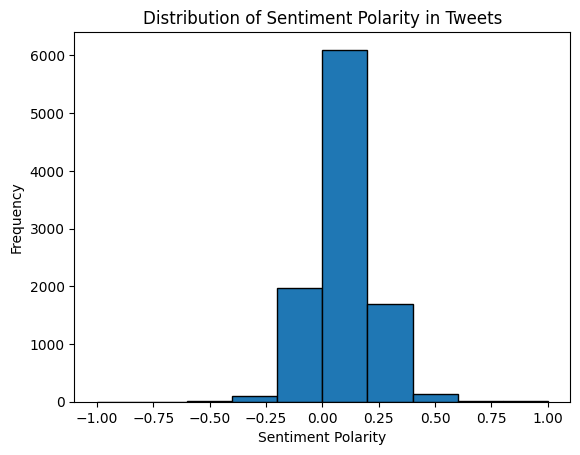

In [ ]:
plt.hist(df['sentiment_polarity'], bins=10, range=(-1, 1), edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity in Tweets')
plt.show()


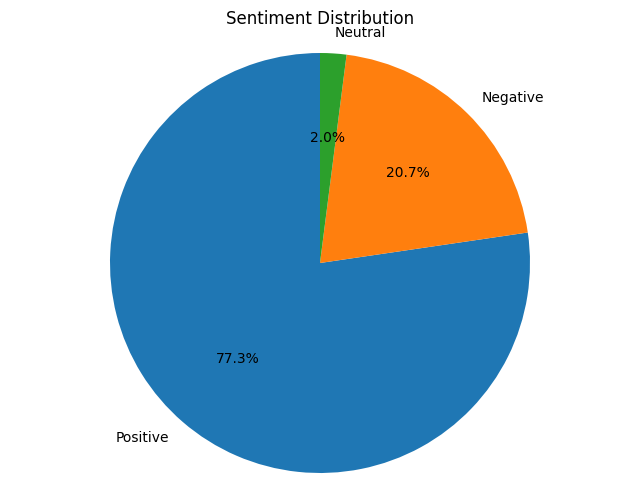

In [ ]:
# Perform sentiment analysis on tweet text
df['Sentiment'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment into positive, negative, and neutral
df['Sentiment Category'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

# Calculate the count of each sentiment category
sentiment_counts = df['Sentiment Category'].value_counts()

# Plot a pie chart of sentiment distribution
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Sentiment Distribution')
plt.show()

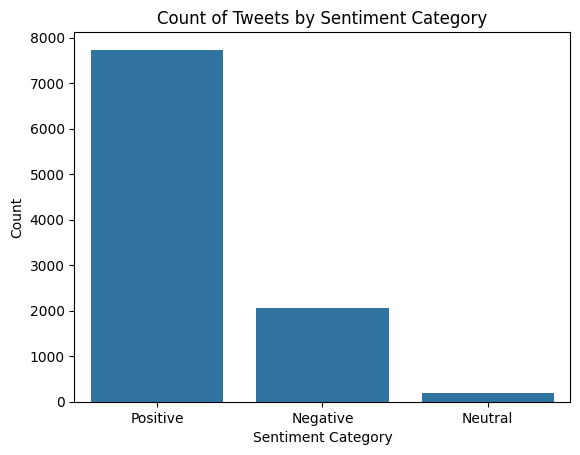

In [ ]:
# Plot the count of tweets by sentiment category
sns.countplot(x='Sentiment Category', data=df)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Count of Tweets by Sentiment Category')
plt.show()

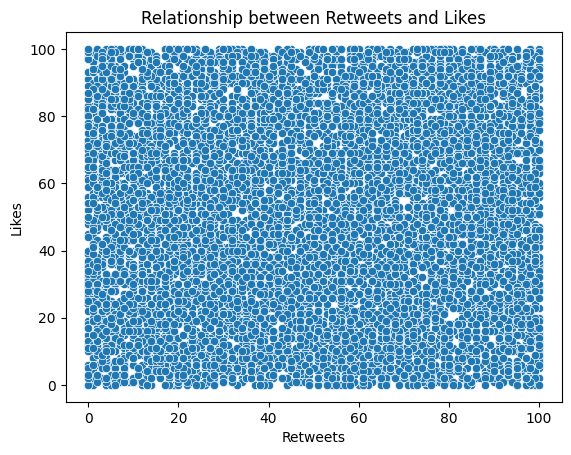

In [ ]:
# Plot the relationship between retweets and likes
sns.scatterplot(x='Retweets', y='Likes', data=df)
plt.xlabel('Retweets')
plt.ylabel('Likes')
plt.title('Relationship between Retweets and Likes')
plt.show()

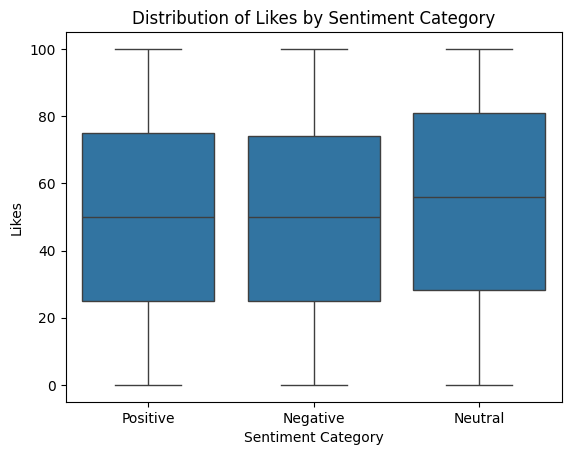

In [ ]:
# Plot the distribution of likes by sentiment category
sns.boxplot(x='Sentiment Category', y='Likes', data=df)
plt.xlabel('Sentiment Category')
plt.ylabel('Likes')
plt.title('Distribution of Likes by Sentiment Category')
plt.show()

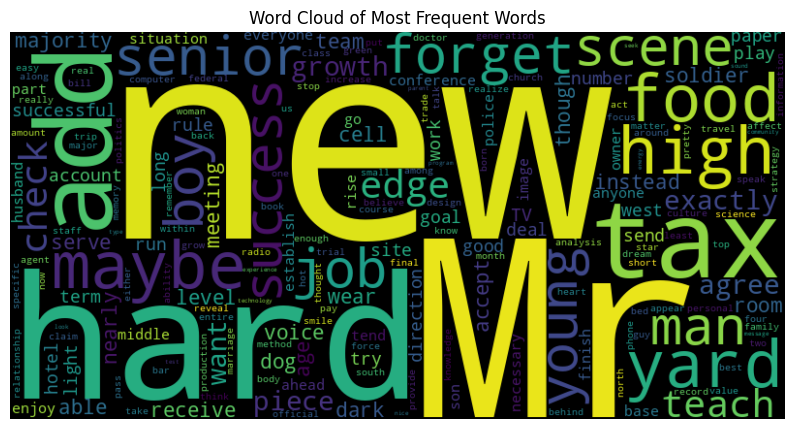

In [ ]:
# Combine all tweet texts into a single string
all_text = ' '.join(df['Text'])

# Generate a word cloud of the most frequent words
wordcloud = WordCloud(width=800, height=400).generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

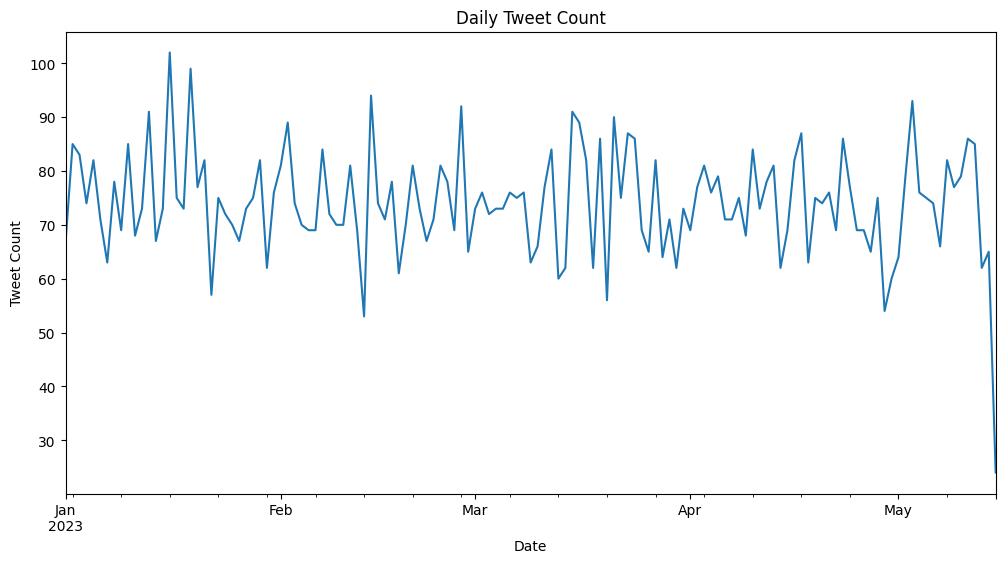

In [ ]:
# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set the 'Timestamp' column as the DataFrame index
df.set_index('Timestamp', inplace=True)

# Resample the data by day and calculate the count of tweets per day
daily_tweet_count = df['Tweet_ID'].resample('D').count()

# Plot the time series of daily tweet count
plt.figure(figsize=(12, 6))
daily_tweet_count.plot()
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Daily Tweet Count')
plt.show()

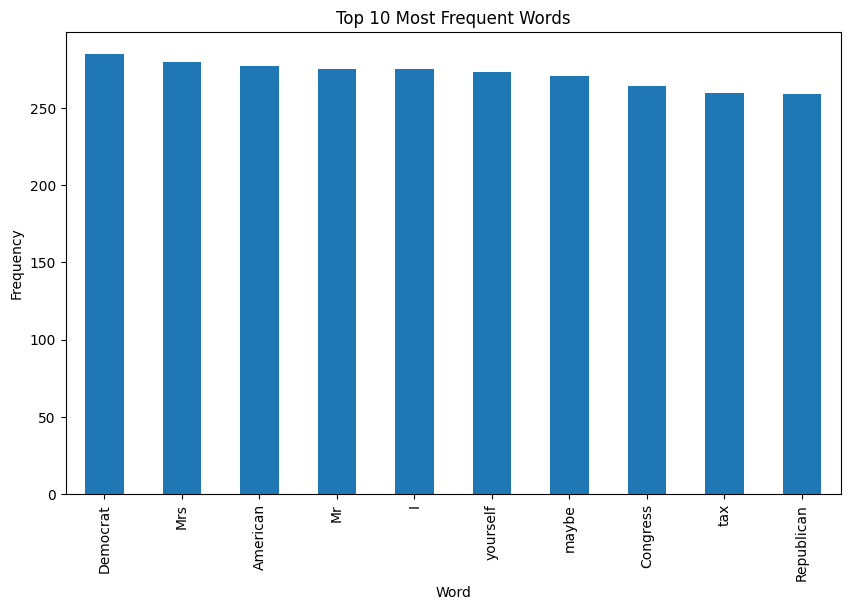

In [ ]:
# Combine all tweet texts into a single string
all_text = ' '.join(df['Text'])

# Split the text into individual words
words = all_text.split()

# Calculate the frequency of each word
word_counts = pd.Series(words).value_counts().sort_values(ascending=False)

# Plot the top 10 most frequent words
plt.figure(figsize=(10, 6))
word_counts.head(10).plot(kind='bar')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.show()

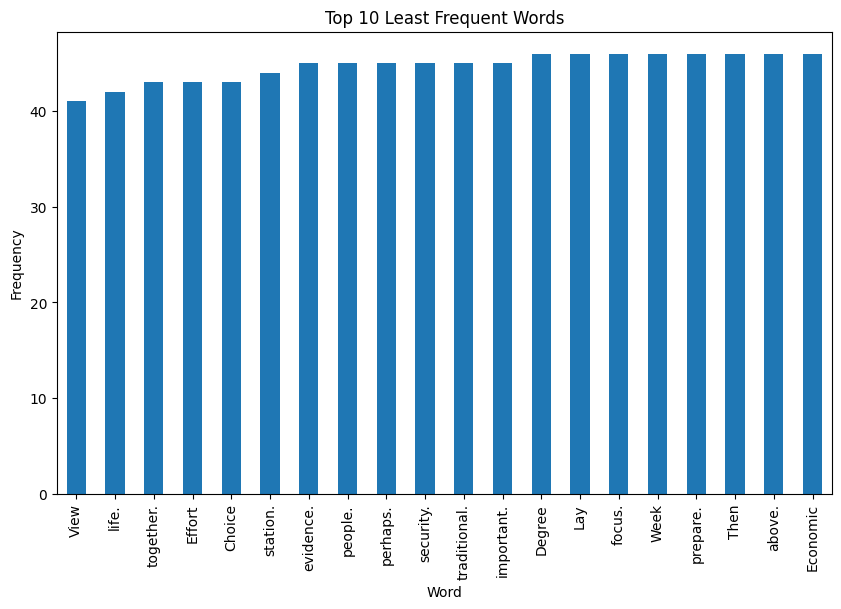

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df['Text'] contains the tweet texts

# Combine all tweet texts into a single string
all_text = ' '.join(df['Text'])

# Split the text into individual words
words = all_text.split()

# Calculate the frequency of each word
word_counts = pd.Series(words).value_counts().sort_values(ascending=True)

# Plot the bottom 10 least frequent words
plt.figure(figsize=(10, 6))
word_counts.head(20).plot(kind='bar')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Least Frequent Words')
plt.show()


USER INTERFACE FOR KEYWORD ANALYSIS


SELECT ONE TOPIC OR EXIT:
1. AMERICAN POLITICS
2. IPL TEAMS
3. BRAND REVIEW
4. EXIT
Enter your choice: 1
TOP TEN MOST FREQUENT WORDS
Democrat 285
Mrs 280
American 277
Mr 275
I 275
yourself 273
maybe 271
Congress 264
tax 260
Republican 259
Enter a keyword to analyze (or type 'exit' to quit): Democrat


<ipython-input-60-6eb9613cbb11>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Sentiment'] = filtered_df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
<ipython-input-60-6eb9613cbb11>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Sentiment Category'] = filtered_df['Sentiment'].apply(categorize_sentiment)


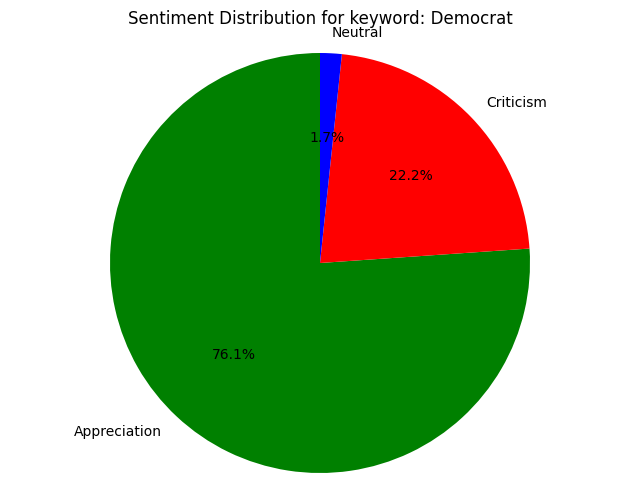

<ipython-input-60-6eb9613cbb11>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment Category', data=filtered_df, palette=colors.values())


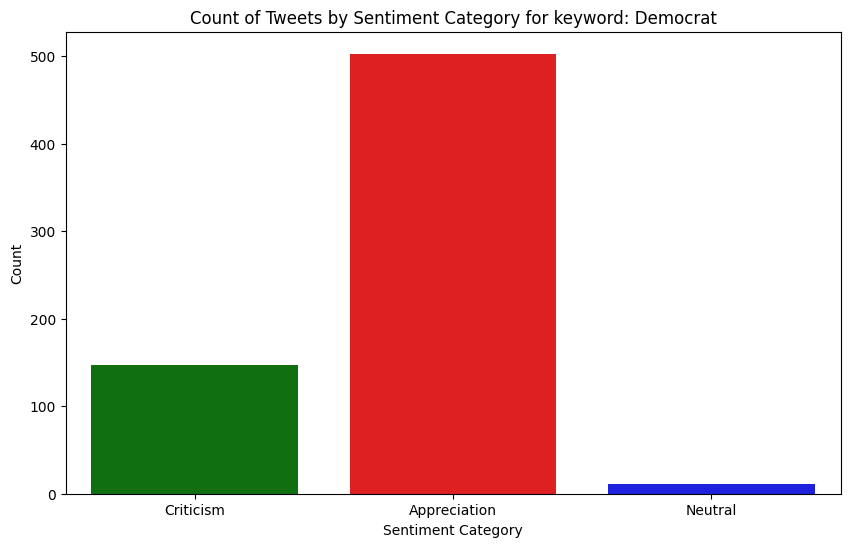

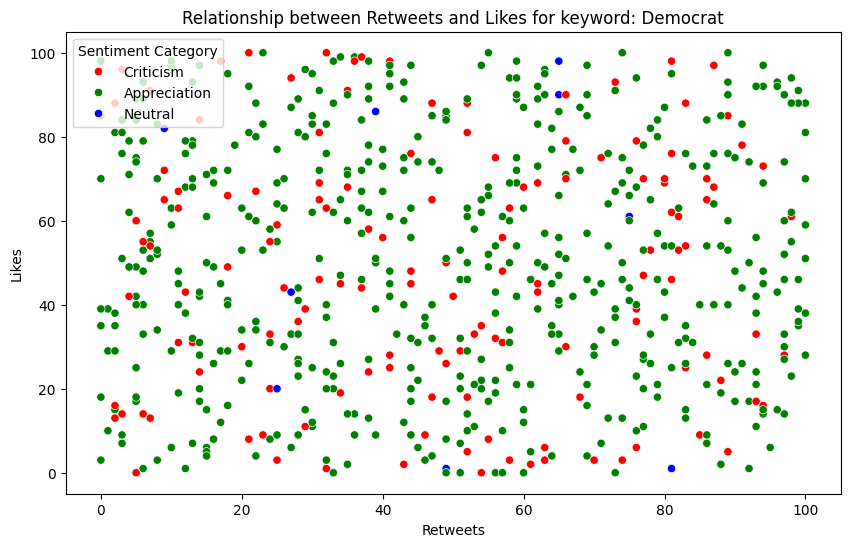

<ipython-input-60-6eb9613cbb11>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment Category', y='Likes', data=filtered_df, palette=colors.values())


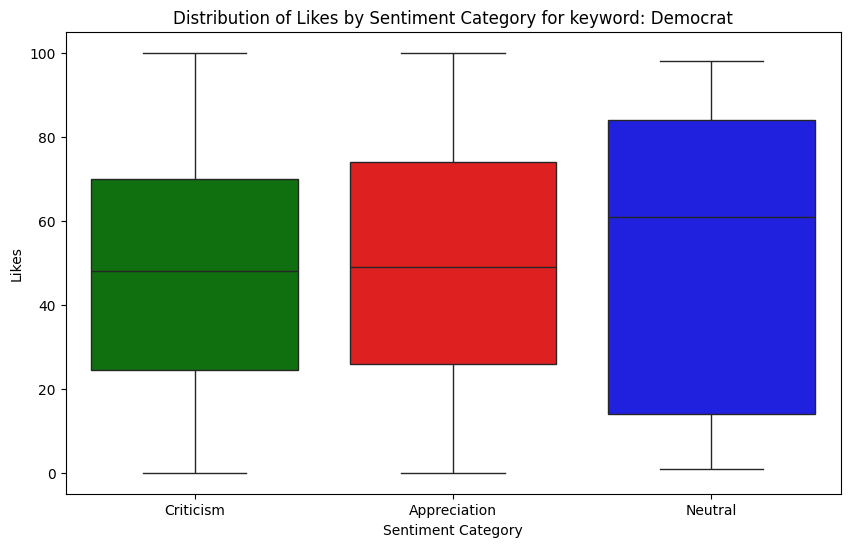

Correlation Matrix for keyword: Democrat

           Retweets     Likes  Sentiment
Retweets   1.000000  0.017934   0.002965
Likes      0.017934  1.000000  -0.008355
Sentiment  0.002965 -0.008355   1.000000


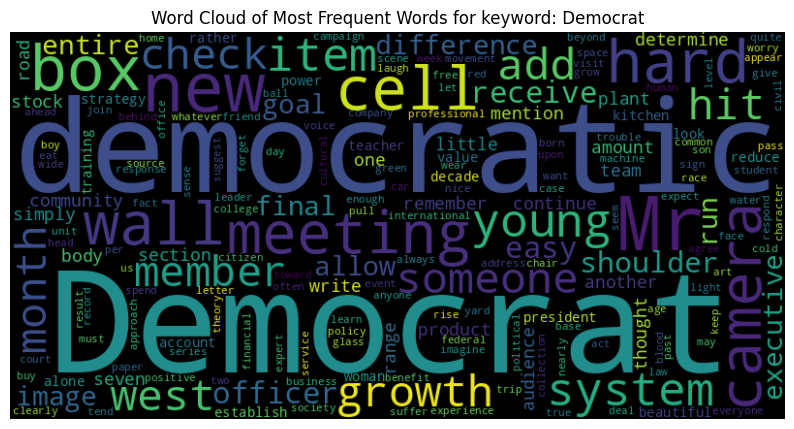

Enter a keyword to analyze (or type 'exit' to quit): exit
Exiting...

SELECT ONE TOPIC OR EXIT:
1. AMERICAN POLITICS
2. IPL TEAMS
3. BRAND REVIEW
4. EXIT
Enter your choice: 2


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


interactive(children=(Dropdown(description='Analysis:', options=('Sentiment Analysis', 'Engagement Analysis', …


SELECT ONE TOPIC OR EXIT:
1. AMERICAN POLITICS
2. IPL TEAMS
3. BRAND REVIEW
4. EXIT
Enter your choice: 3


interactive(children=(Dropdown(description='Analysis Task:', options=('Sentiment Analysis', 'Visualize Sentime…


SELECT ONE TOPIC OR EXIT:
1. AMERICAN POLITICS
2. IPL TEAMS
3. BRAND REVIEW
4. EXIT
Enter your choice: 4
Exiting...


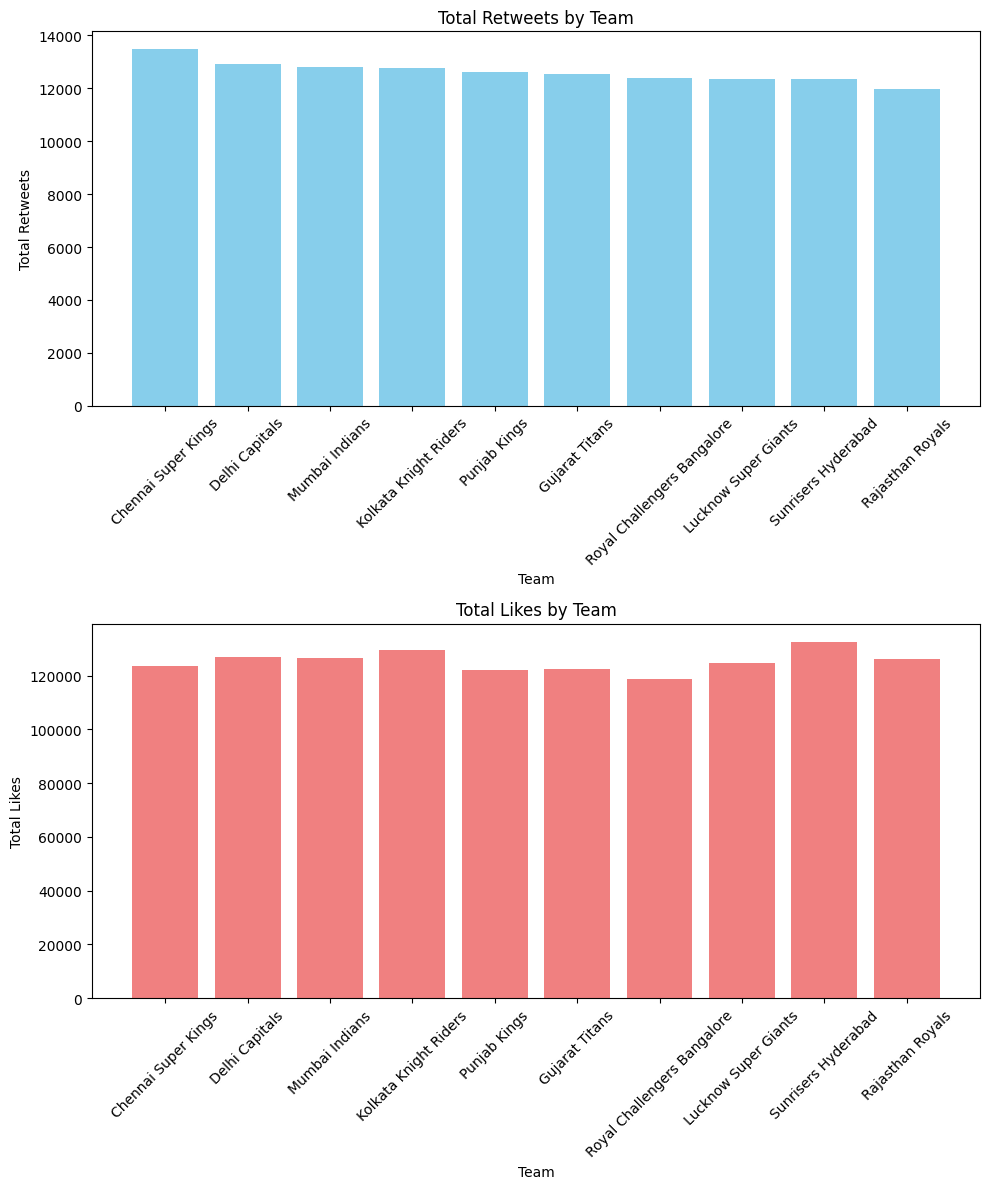

In [ ]:
4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from ipywidgets import interact, widgets

# Function to load the American politics dataset
def load_american_politics_dataset():
    return pd.read_csv("/content/twitter_dataset.csv")

# Function to analyze sentiment for American politics
def analyze_american_politics_sentiment(df):
    def display_top_frequent_words(df, n=10):
        all_text = ' '.join(df['Text'])
        words = all_text.split()
        word_counts = pd.Series(words).value_counts().sort_values(ascending=False)
        for word, count in word_counts.head(n).items():
            print(word, count)
        return word_counts.head(n)

    def analyze_sentiment(keyword):
        filtered_df = df[df['Text'].str.contains(keyword, case=False)]
        if filtered_df.empty:
            print("Keyword '{}' not found in tweets.".format(keyword))
            return

        filtered_df['Sentiment'] = filtered_df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

        def categorize_sentiment(score):
            if score > 0:
                return 'Appreciation'
            elif score < 0:
                return 'Criticism'
            else:
                return 'Neutral'

        filtered_df['Sentiment Category'] = filtered_df['Sentiment'].apply(categorize_sentiment)
        sentiment_counts = filtered_df['Sentiment Category'].value_counts()

        colors = {'Appreciation': 'green', 'Criticism': 'red', 'Neutral': 'blue'}

        plt.figure(figsize=(8, 6))
        plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=[colors[s] for s in sentiment_counts.index])
        plt.axis('equal')
        plt.title('Sentiment Distribution for keyword: {}'.format(keyword))
        plt.show()

        plt.figure(figsize=(10, 6))
        sns.countplot(x='Sentiment Category', data=filtered_df, palette=colors.values())
        plt.xlabel('Sentiment Category')
        plt.ylabel('Count')
        plt.title('Count of Tweets by Sentiment Category for keyword: {}'.format(keyword))
        plt.show()

        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='Retweets', y='Likes', data=filtered_df, hue='Sentiment Category', palette=colors)
        plt.xlabel('Retweets')
        plt.ylabel('Likes')
        plt.title('Relationship between Retweets and Likes for keyword: {}'.format(keyword))
        plt.legend(title='Sentiment Category')
        plt.show()

        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Sentiment Category', y='Likes', data=filtered_df, palette=colors.values())
        plt.xlabel('Sentiment Category')
        plt.ylabel('Likes')
        plt.title('Distribution of Likes by Sentiment Category for keyword: {}'.format(keyword))
        plt.show()

        correlation_matrix = filtered_df[['Retweets', 'Likes', 'Sentiment']].corr()
        print("Correlation Matrix for keyword: {}\n".format(keyword))
        print(correlation_matrix)

        all_text_filtered = ' '.join(filtered_df['Text'])
        wordcloud_filtered = WordCloud(width=800, height=400).generate(all_text_filtered)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud_filtered, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Most Frequent Words for keyword: {}'.format(keyword))
        plt.show()

    print("TOP TEN MOST FREQUENT WORDS")
    top_words = display_top_frequent_words(df, n=10)
    while True:
        keyword = input("Enter a keyword to analyze (or type 'exit' to quit): ")
        if keyword.lower() == 'exit':
            print("Exiting...")
            break
        else:
            analyze_sentiment(keyword)

# Function to load the IPL teams dataset
def load_ipl_teams_dataset():
    return pd.read_csv('/content/ipldataset.csv')

# Function to analyze sentiment for IPL teams
def analyze_ipl_teams_sentiment(df):
    nltk.download('vader_lexicon')  # Fix: Download the NLTK resource
    def perform_sentiment_analysis():
        sid = SentimentIntensityAnalyzer()
        df['sentiment_score'] = df['tweets'].apply(lambda x: sid.polarity_scores(x)['compound'])
        df['sentiment'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0.05 else 'Negative' if x < -0.05 else 'Neutral')
        sentiment_distribution = df.groupby(['team', 'sentiment']).size().unstack(fill_value=0)
        sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title('Sentiment Analysis of Tweets for Each Team')
        plt.xlabel('Team')
        plt.ylabel('Number of Tweets')
        plt.xticks(rotation=45)
        plt.legend(title='Sentiment')
        plt.tight_layout()
        plt.show()

    def perform_engagement_analysis():
        total_engagement = df.groupby('team').agg({'retweets': 'sum', 'likes': 'sum'}).reset_index()
        total_engagement = total_engagement.sort_values(by=['retweets', 'likes'], ascending=False)
        fig, axes = plt.subplots(2, 1, figsize=(10, 12))
        axes[0].bar(total_engagement['team'], total_engagement['retweets'], color='skyblue')
        axes[0].set_title('Total Retweets by Team')
        axes[0].set_xlabel('Team')
        axes[0].set_ylabel('Total Retweets')
        axes[0].tick_params(axis='x', rotation=45)
        axes[1].bar(total_engagement['team'], total_engagement['likes'], color='lightcoral')
        axes[1].set_title('Total Likes by Team')
        axes[1].set_xlabel('Team')
        axes[1].set_ylabel('Total Likes')
        axes[1].tick_params(axis='x', rotation=45)
        plt.tight_layout()
        plt.show()

    def perform_tweet_activity_analysis():
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df['date'] = df['timestamp'].dt.date
        tweet_activity = df.groupby(['team', 'date']).size().reset_index(name='tweet_count')
        fig, ax = plt.subplots(figsize=(12, 6))
        for team in df['team'].unique():
            team_data = tweet_activity[tweet_activity['team'] == team]
            ax.plot(team_data['date'], team_data['tweet_count'], label=team)
        ax.set_title('Tweet Activity Over Time for Each Team')
        ax.set_xlabel('Date')
        ax.set_ylabel('Number of Tweets')
        ax.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def perform_word_cloud_analysis():
        for team in df['team'].unique():
            team_tweets = ' '.join(df[df['team'] == team]['tweets'])
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(team_tweets)
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.title(f'Word Cloud for {team}')
            plt.axis('off')
            plt.show()

    def perform_hashtag_analysis():
        def extract_hashtags(tweet):
            hashtags = re.findall(r'#(\w+)', tweet)
            return hashtags
        df['hashtags'] = df['tweets'].apply(extract_hashtags)
        hashtag_counts = df.explode('hashtags').groupby('team')['hashtags'].value_counts().reset_index(name='count')
        popular_hashtags = hashtag_counts.groupby('team').head(5)
        print("Popular hashtags associated with each team:")
        print(popular_hashtags)

    def select_analysis(analysis):
        if analysis == 'Sentiment Analysis':
            perform_sentiment_analysis()
        elif analysis == 'Engagement Analysis':
            perform_engagement_analysis()
        elif analysis == 'Tweet Activity Analysis':
            perform_tweet_activity_analysis()
        elif analysis == 'Word Cloud Analysis':
            perform_word_cloud_analysis()
        elif analysis == 'Hashtag Analysis':
            perform_hashtag_analysis()

    interact(select_analysis, analysis=widgets.Dropdown(options=['Sentiment Analysis', 'Engagement Analysis', 'Tweet Activity Analysis', 'Word Cloud Analysis', 'Hashtag Analysis'], value='Sentiment Analysis', description='Analysis:'))

# Function to load the brand review dataset
def load_brand_review_dataset():
    return pd.read_csv('textile_product_reviews.csv')

# Function to perform sentiment analysis for brand reviews
def analyze_brand_reviews_sentiment(df):
    def sentiment_analysis(df):
        sentiment_counts = df['sentiment'].value_counts()
        print("Sentiment Analysis:")
        print(sentiment_counts)

    def visualize_sentiment_distribution(df):
        sentiment_distribution = df.groupby(['textile_brand', 'sentiment']).size().unstack(fill_value=0)
        sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title('Sentiment Analysis by Textile Brand')
        plt.xlabel('Textile Brand')
        plt.ylabel('Number of Reviews')
        plt.xticks(rotation=45)
        plt.legend(title='Sentiment')
        plt.tight_layout()
        plt.show()

    def generate_word_clouds(df):
        brand_reviews = df.groupby('textile_brand')['review'].apply(' '.join)
        for brand, reviews in brand_reviews.items():
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews)
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.title(f'Word Cloud for {brand}')
            plt.axis('off')
            plt.show()

    def top_performing_brands(df):
        average_sentiment = df.groupby('textile_brand')['sentiment'].apply(lambda x: (x == 'Positive').mean())
        top_brands = average_sentiment.sort_values(ascending=False)
        print("Top performing textile brands based on sentiment:")
        print(top_brands)

    def choose_analysis_task(Analysis_Task):
        if Analysis_Task == 'Sentiment Analysis':
            sentiment_analysis(df)
        elif Analysis_Task == 'Visualize Sentiment Distribution by Brand':
            visualize_sentiment_distribution(df)
        elif Analysis_Task == 'Generate Word Clouds for Each Brand':
            generate_word_clouds(df)
        elif Analysis_Task == 'Calculate Top Performing Textile Brands Based on Sentiment':
            top_performing_brands(df)

    analysis_tasks = ['Sentiment Analysis', 'Visualize Sentiment Distribution by Brand',
                      'Generate Word Clouds for Each Brand', 'Calculate Top Performing Textile Brands Based on Sentiment']

    interact(choose_analysis_task, Analysis_Task=widgets.Dropdown(options=analysis_tasks, value='Sentiment Analysis', description='Analysis Task:'))

# Main function to present the options to the user
def main():
    while True:
        print("\nSELECT ONE TOPIC OR EXIT:")
        print("1. AMERICAN POLITICS")
        print("2. IPL TEAMS")
        print("3. BRAND REVIEW")
        print("4. EXIT")

        option = input("Enter your choice: ")

        if option == '1':
            df = load_american_politics_dataset()
            analyze_american_politics_sentiment(df)
        elif option == '2':
            df = load_ipl_teams_dataset()
            analyze_ipl_teams_sentiment(df)
        elif option == '3':
            df = load_brand_review_dataset()
            analyze_brand_reviews_sentiment(df)
        elif option == '4':
            print("Exiting...")
            break  # Exit the loop when '4' (EXIT) is selected
        else:
            print("Invalid option. Please select a valid option.")

if __name__ == "__main__":
    main()
